# LIBRARY and IMPORT

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [304]:
train = pd.read_csv('train_NYC_cab.csv')
test= pd.read_csv('test_NYC_taxi.csv')


# COLUMN HOUR CREATION

In [305]:
train.pickup_datetime = pd.to_datetime(train.pickup_datetime)

train['pickup_month'] = train['pickup_datetime'].dt.month
train['pickup_day'] = train['pickup_datetime'].dt.day
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_minute'] = train['pickup_datetime'].dt.minute

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
test.pickup_datetime = pd.to_datetime(test.pickup_datetime)

test['pickup_month'] = test['pickup_datetime'].dt.month
test['pickup_day'] = test['pickup_datetime'].dt.day
test['pickup_hour'] = test['pickup_datetime'].dt.hour
test['pickup_minute'] = test['pickup_datetime'].dt.minute

train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_month                   int64
pickup_day                     int64
pickup_hour                    int64
pickup_minute                  int64
dtype: object

# CLEANING DATAS

In [306]:
m = np.mean(train['trip_duration'])
s = np.std(train['trip_duration'])
train = train[train['trip_duration'] <= m + 2*s]
train = train[train['trip_duration'] >= m - 2*s]


train = train[train['pickup_longitude'] <= -73.2]
train = train[train['pickup_longitude'] >= -74.5]
train = train[train['pickup_latitude'] <= 41.4]
train = train[train['pickup_latitude'] >= 40.1]
train = train[train['dropoff_longitude'] <= -73.2]
train = train[train['dropoff_longitude'] >= -74.5]
train = train[train['dropoff_latitude'] <= 41.4]
train = train[train['dropoff_latitude'] >= 40.1]



# ADDING 'DISTANCE' COLUMN - calculated from longitude and latitude

# HAVERSINE FORMULA

In [307]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

train['lat1'] = np.radians(train['pickup_latitude'])
train['lon1'] = np.radians(train['pickup_longitude'])
train['lat2'] = np.radians(train['dropoff_latitude'])
train['lon2'] = np.radians(train['dropoff_longitude'])

train['dlon'] = train['lon2'] - train['lon1']
train['dlat'] = train['lat2'] - train['lat1']

train['a'] = np.sin(train['dlat'] / 2)**2 + np.cos(train['lat1']) * np.cos(train['lat2']) * np.sin(train['dlon'] / 2)**2
train['c'] = 2 * np.arctan2(np.sqrt(train['a']), np.sqrt(1 - train['a']))

train['distance'] = R * train['c']

train.head()
#++++++++++++++++++++++++++++++++++
test['lat1'] = np.radians(test['pickup_latitude'])
test['lon1'] = np.radians(test['pickup_longitude'])
test['lat2'] = np.radians(test['dropoff_latitude'])
test['lon2'] = np.radians(test['dropoff_longitude'])

test['dlon'] = test['lon2'] - test['lon1']
test['dlat'] = test['lat2'] - test['lat1']

test['a'] = np.sin(test['dlat'] / 2)**2 + np.cos(test['lat1']) * np.cos(test['lat2']) * np.sin(test['dlon'] / 2)**2
test['c'] = 2 * np.arctan2(np.sqrt(test['a']), np.sqrt(1 - test['a']))

test['distance'] = R * test['c']

train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_minute,lat1,lon1,lat2,lon2,dlon,dlat,a,c,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,24,0.711535,-1.291232,0.711494,-1.290926,0.000306,-0.000041,1.383090e-08,0.000235,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,43,0.711022,-1.291202,0.710893,-1.291535,-0.000333,-0.000129,2.007813e-08,0.000283,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,35,0.711465,-1.291178,0.710525,-1.291637,-0.000459,-0.000940,2.511077e-07,0.001002,6.387103
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,32,0.710698,-1.291719,0.710466,-1.291758,-0.000039,-0.000231,1.359156e-08,0.000233,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,30,0.711976,-1.291073,0.711789,-1.291071,0.000002,-0.000187,8.701374e-09,0.000187,1.188962


# ROTATION MAP

In [308]:
py = train['pickup_latitude']
px = train['pickup_longitude']
ox, oy = [-73.97,40.75]
angle = 10

qx_pick = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
qy_pick = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
train['rot_pick_long'] = qx_pick
train['rot_pick_lat'] = qy_pick


In [309]:
py = test['pickup_latitude']
px = test['pickup_longitude']
ox, oy = [-73.97,40.75]
angle = 10

qx_pick = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
qy_pick = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
test['rot_pick_long'] = qx_pick
test['rot_pick_lat'] = qy_pick


In [310]:
py = train['dropoff_latitude']
px = train['dropoff_longitude']
ox, oy = [-73.97,40.75]
angle = 10

qx_pick = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
qy_pick = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
train['rot_drop_long'] = qx_pick
train['rot_drop_lat'] = qy_pick

In [311]:
py = test['dropoff_latitude']
px = test['dropoff_longitude']
ox, oy = [-73.97,40.75]
angle = 10

qx_pick = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
qy_pick = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
test['rot_drop_long'] = qx_pick
test['rot_drop_lat'] = qy_pick

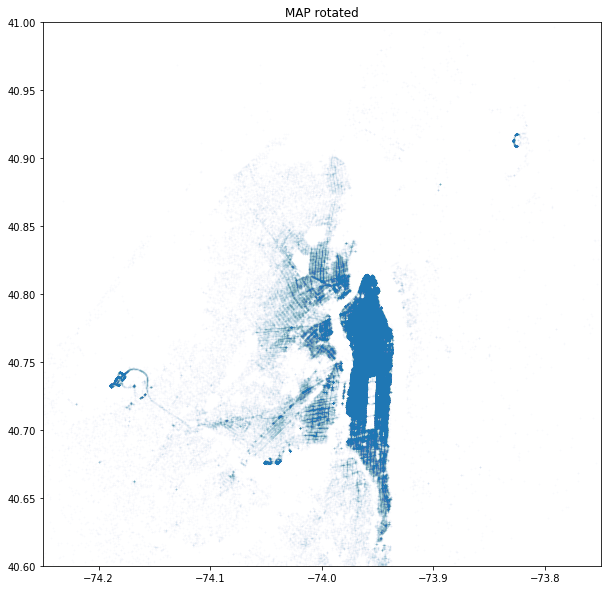

In [312]:
plt.xlim(-74.25,-73.75)
plt.ylim(40.6,41)
plt.scatter(train['rot_drop_long'], train['rot_drop_lat'], alpha=0.01, marker='.', s=5)
plt.title('MAP rotated')
plt.show()

# BEARING / VECTORS 

In [313]:
train['lat1'] = np.radians(train['pickup_latitude'])
train['lon1'] = np.radians(train['pickup_longitude'])
train['lat2'] = np.radians(train['dropoff_latitude'])
train['lon2'] = np.radians(train['dropoff_longitude'])

train['dLon'] = ''
train['dLon'] = train['lon2'] - train['lon1']

y = np.sin(train['dLon']) * np.cos(train['lat2'])
x = np.cos(train['lat1'])*np.sin(train['lat2']) - np.sin(train['lat1'])*np.cos(train['lat2'])*np.cos(train['dLon'])
train['bearing'] = np.arctan2(y, x) * 180 / np.pi
#+++++++++++++++++++++++++++++++++++
test['lat1'] = np.radians(test['pickup_latitude'])
test['lon1'] = np.radians(test['pickup_longitude'])
test['lat2'] = np.radians(test['dropoff_latitude'])
test['lon2'] = np.radians(test['dropoff_longitude'])

test['dLon'] = ''
test['dLon'] = test['lon2'] - test['lon1']

y = np.sin(test['dLon']) * np.cos(test['lat2'])
x = np.cos(test['lat1'])*np.sin(test['lat2']) - np.sin(test['lat1'])*np.cos(test['lat2'])*np.cos(test['dLon'])
test['bearing'] = np.arctan2(y, x) * 180 / np.pi

test.describe()



,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day,pickup_hour,pickup_minute,...,dlat,a,c,distance,rot_pick_long,rot_pick_lat,rot_drop_long,rot_drop_lat,dLon,bearing
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,...,625134.000000,6.251340e+05,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816,3.521874,15.487283,13.610228,29.598908,...,0.000016,1.849979e-07,0.000539,3.434489,-73.966463,40.751188,-73.966110,40.750357,0.000003,-15.574764
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824,1.680049,8.703919,6.394761,17.330197,...,0.000610,8.895352e-06,0.000671,4.273579,0.062659,0.048483,0.059886,0.054430,0.000801,104.459126
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322,1.000000,1.000000,0.000000,0.000000,...,-0.073001,0.000000e+00,0.000000,0.000000,-79.684333,37.602509,-77.500586,30.425586,-0.082195,-179.995569
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000,2.000000,8.000000,9.000000,15.000000,...,-0.000234,9.347520e-09,0.000193,1.232316,-73.966786,40.733105,-73.968155,40.729508,-0.000196,-124.943348
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543,4.000000,15.000000,14.000000,30.000000,...,0.000005,2.700034e-08,0.000329,2.094395,-73.960299,40.751829,-73.960907,40.751413,0.000023,8.248382
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852,5.000000,23.000000,19.000000,45.000000,...,0.000244,9.284558e-08,0.000609,3.883779,-73.951387,40.771460,-73.951459,40.772038,0.000244,53.439931
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597,6.000000,31.000000,23.000000,59.000000,...,0.141566,6.596650e-03,0.162619,1036.368707,-35.553640,69.662581,-35.553590,69.662868,0.113188,180.000000


In [314]:
train['speed'] = train['distance'] / train['trip_duration'] * 3600

train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,a,c,distance,rot_pick_long,rot_pick_lat,rot_drop_long,rot_drop_lat,dLon,bearing,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1.383090e-08,0.000235,1.498991,-73.950043,40.741562,-73.966018,40.733987,0.000306,99.970196,11.860150
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2.007813e-08,0.000283,1.806074,-73.967482,40.765262,-73.955517,40.781854,-0.000333,-117.153768,9.806736
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,2.511077e-07,0.001002,6.387103,-73.954843,40.743215,-73.962067,40.802712,-0.000459,-159.680165,10.825598
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1.359156e-08,0.000233,1.485965,-73.952740,40.796979,-73.958080,40.809311,-0.000039,-172.737700,12.469634
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,8.701374e-09,0.000187,1.188962,-73.943932,40.715405,-73.949855,40.724303,0.000002,179.473585,9.839682


In [315]:
"""
a = 0.9999
b = 0.0001

train = train[train.distance > train.distance.quantile(b)]
train = train[train.distance < train.distance.quantile(a)]
train = train[train.speed > train.speed.quantile(b)]
train = train[train.speed < train.speed.quantile(a)]
"""

'\na = 0.9999\nb = 0.0001\n\ntrain = train[train.distance > train.distance.quantile(b)]\ntrain = train[train.distance < train.distance.quantile(a)]\ntrain = train[train.speed > train.speed.quantile(b)]\ntrain = train[train.speed < train.speed.quantile(a)]\n'

In [316]:
train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_month                   int64
pickup_day                     int64
pickup_hour                    int64
pickup_minute                  int64
lat1                         float64
lon1                         float64
lat2                         float64
lon2                         float64
dlon                         float64
dlat                         float64
a                            float64
c                            float64
distance                     float64
rot_pick_long                float64
rot_pick_lat                 float64
rot_drop_long                float64
r

In [317]:
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)

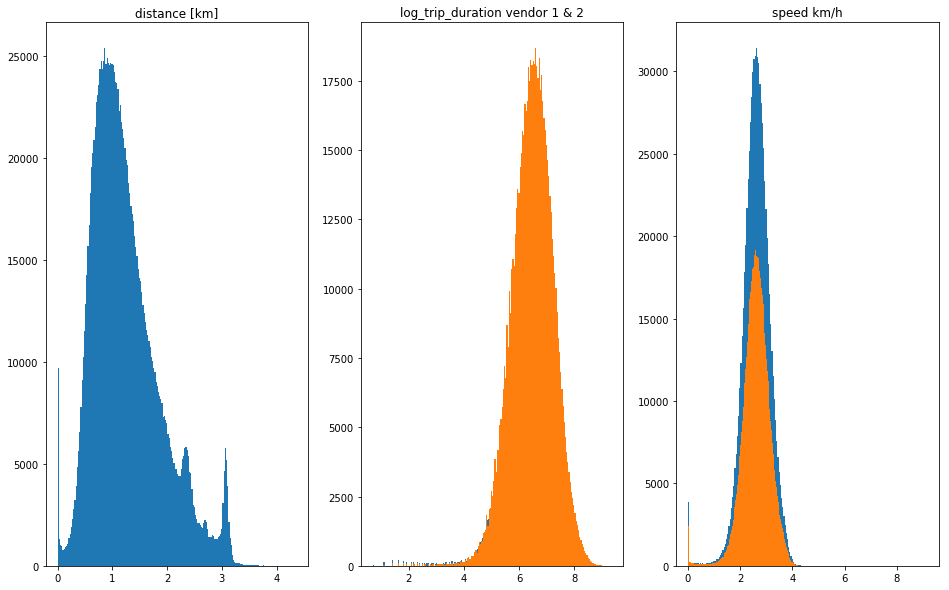

In [318]:
plt.rcParams['figure.figsize'] = [16, 10]
fig, ax = plt.subplots(ncols=3, sharex=False, sharey=False)
ax[0].hist(np.log(train['distance']+1), bins=200)
ax[0].set_title('distance [km]')
ax[1].hist(train['log_trip_duration'].loc[train['vendor_id']==1], bins=200)
ax[1].hist(train['log_trip_duration'].loc[train['vendor_id']==2], bins=200)
ax[1].set_title('log_trip_duration vendor 1 & 2')
ax[2].set_title('speed km/h')
ax[2].hist(np.log(train['speed'].loc[train['vendor_id']==2]+1), bins=200)
ax[2].hist(np.log(train['speed'].loc[train['vendor_id']==1]+1), bins=200)


plt.show()

In [319]:
train['flag']=''
train.flag.loc[train['store_and_fwd_flag'] =='Y'] = 1
train.flag.loc[train['store_and_fwd_flag'] =='N'] = 0
flag_train = pd.get_dummies(train['store_and_fwd_flag'], prefix='flg', prefix_sep='_')
flag_test = pd.get_dummies(test['store_and_fwd_flag'], prefix='flg', prefix_sep='_')

test['flag']=''
test.flag.loc[test['store_and_fwd_flag'] =='Y'] = 1
test.flag.loc[test['store_and_fwd_flag'] =='N'] = 0

train = pd.concat([train, flag_train], axis=1)
test = pd.concat([test, flag_test], axis=1)

C:\Users\genette\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [320]:
train.loc[:, 'pickup_weekday'] = train['pickup_datetime'].dt.weekday
train.loc[:, 'pickup_weekofyear'] = train['pickup_datetime'].dt.weekofyear

test.loc[:, 'pickup_weekday'] = test['pickup_datetime'].dt.weekday
test.loc[:, 'pickup_weekofyear'] = test['pickup_datetime'].dt.weekofyear

weekday_train = pd.get_dummies(train['pickup_weekday'], prefix='weekd', prefix_sep='_')
weekday_test = pd.get_dummies(test['pickup_weekday'], prefix='weekd', prefix_sep='_')
train = pd.concat([train, weekday_train], axis=1)
test = pd.concat([test, weekday_test], axis=1)

train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,flg_Y,pickup_weekday,pickup_weekofyear,weekd_0,weekd_1,weekd_2,weekd_3,weekd_4,weekd_5,weekd_6
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,0,11,1,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,6,23,0,0,0,0,0,0,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,0,1,3,0,1,0,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,0,2,14,0,0,1,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0,5,12,0,0,0,0,0,1,0


In [321]:
vendor_train = pd.get_dummies(train['vendor_id'], prefix='vend', prefix_sep='_')
vendor_test = pd.get_dummies(test['vendor_id'], prefix='vend', prefix_sep='_')
train = pd.concat([train, vendor_train], axis=1)
test = pd.concat([test, vendor_test], axis=1)

In [322]:
train.loc[:, 'center_latitude'] = (train['pickup_latitude'].values + train['dropoff_latitude'].values) / 2
train.loc[:, 'center_longitude'] = (train['pickup_longitude'].values + train['dropoff_longitude'].values) / 2

test.loc[:, 'center_latitude'] = (test['pickup_latitude'].values + test['dropoff_latitude'].values) / 2
test.loc[:, 'center_longitude'] = (test['pickup_longitude'].values + test['dropoff_longitude'].values) / 2

# 99% Percentile

In [323]:
train.distance.describe()

count    1.456454e+06
mean     3.434600e+00
std      3.931264e+00
min      0.000000e+00
25%      1.232131e+00
50%      2.093910e+00
75%      3.875325e+00
max      7.740615e+01
Name: distance, dtype: float64

# CLUSTERING NEW-YORK MAP 

In [324]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_hour,...,weekd_1,weekd_2,weekd_3,weekd_4,weekd_5,weekd_6,vend_1,vend_2,center_latitude,center_longitude
count,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,...,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06
mean,1.534298e+00,1.663951e+00,-7.397344e+01,4.075095e+01,-7.397334e+01,4.075183e+01,8.367683e+02,3.516774e+00,1.550392e+01,1.360656e+01,...,1.390116e-01,1.441000e-01,1.498599e-01,1.532338e-01,1.513704e-01,1.338985e-01,4.657023e-01,5.342977e-01,4.075139e+01,-7.397339e+01
std,4.988225e-01,1.313631e+00,3.839180e-02,2.818693e-02,3.616926e-02,3.241839e-02,6.585671e+02,1.681032e+00,8.702965e+00,6.399345e+00,...,3.459588e-01,3.511912e-01,3.569341e-01,3.602129e-01,3.584097e-01,3.405433e-01,4.988225e-01,4.988225e-01,2.567278e-02,2.986090e-02
min,1.000000e+00,0.000000e+00,-7.445901e+01,4.021384e+01,-7.447962e+01,4.022580e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.022580e+01,-7.445901e+01
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073736e+01,-7.399133e+01,4.073589e+01,3.970000e+02,2.000000e+00,8.000000e+00,9.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.073715e+01,-7.399012e+01
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075453e+01,6.620000e+02,4.000000e+00,1.500000e+01,1.400000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.075324e+01,-7.397973e+01
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01,1.073000e+03,5.000000e+00,2.300000e+01,1.900000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.076726e+01,-7.396552e+01
max,2.000000e+00,9.000000e+00,-7.322268e+01,4.131916e+01,-7.320551e+01,4.138700e+01,1.141100e+04,6.000000e+00,3.100000e+01,2.300000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.131788e+01,-7.322268e+01


# PCA

In [325]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2) 

pca.fit(train[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])

T = pca.transform(train[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])

U = pca.transform(test[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])

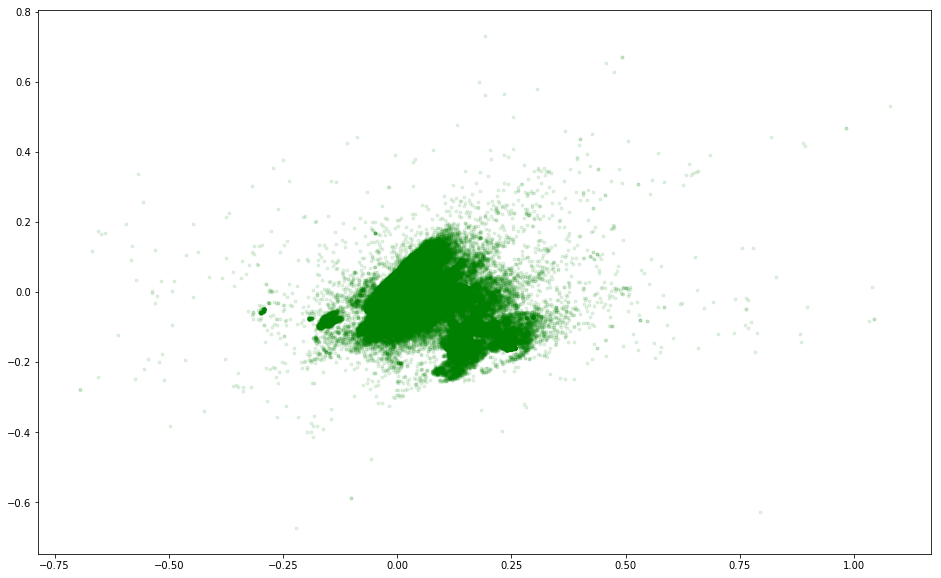

In [326]:
train['pca01'] = T[:,0]
train['pca02'] = T[:,1]

test['pca01'] = U[:,0]
test['pca02'] = U[:,1]
#ax.scatter(T[:,0], T[:,1], c='blue', marker='.', alpha=0.75) 

plt.scatter(x=train['pca01'], y=train['pca02'], marker='.', c='green', alpha=0.1) 

plt.show() 

In [327]:
T

array([[ 0.00094791,  0.02432148],
       [-0.02507319, -0.02515548],
       [-0.03169795, -0.02720079],
       ...,
       [-0.01661388, -0.03240742],
       [-0.00643132,  0.00517692],
       [ 0.00175504,  0.04798154]])

In [328]:
train.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,weekd_3,weekd_4,weekd_5,weekd_6,vend_1,vend_2,center_latitude,center_longitude,pca01,pca02
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,0,1,0,0,0,1,40.742846,-73.988556,-0.022131,-0.013116
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,0,0,0,1,1,0,40.771963,-73.985565,-0.011208,0.039520
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,0,1,0,0,0,1,40.738085,-73.981781,-0.016614,-0.032407
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,0,0,0,0,1,0,40.753084,-73.978355,-0.006431,0.005177
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,...,0,0,0,0,1,0,40.786167,-73.976173,0.001755,0.047982


In [329]:
train.shape

(1456454, 50)

# KMEANS

In [330]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans



In [331]:
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values,
                    test[['pickup_latitude', 'pickup_longitude']].values,
                    test[['dropoff_latitude', 'dropoff_longitude']].values))
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords)

# PICKUP CLUSTERS 

In [332]:

train['kmean_pickup'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
clusters_pickup = kmeans.cluster_centers_
#++++++++++++++++++++++++++++++++++
test['kmean_pickup'] = kmeans.predict(test[['pickup_latitude', 'pickup_longitude']])

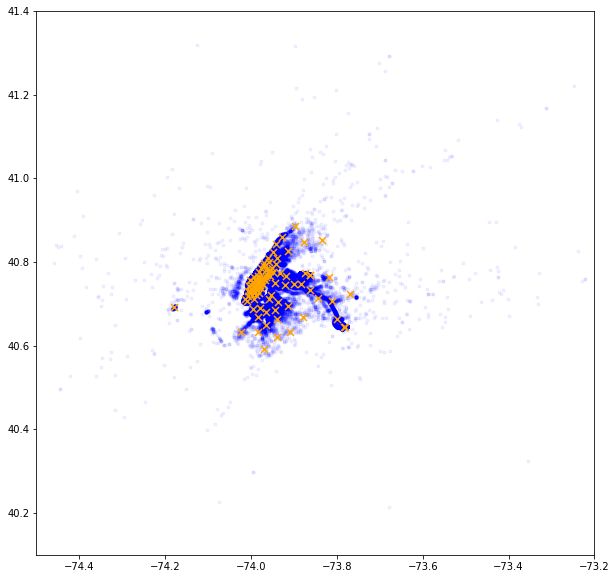

In [333]:
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
plt.xlim(-74.5,-73.2)
plt.ylim(40.1,41.4)
plt.scatter(train['pickup_longitude'], train['pickup_latitude'], marker='.', c='blue', alpha=0.05)
plt.scatter(clusters_pickup[:,1], clusters_pickup[:,0], marker='x', c='orange', s=50)
plt.show()

# DROPOFF CLUSTERS 

In [334]:
train['kmean_dropoff'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])
clusters_dropoff = kmeans.cluster_centers_
#++++++++++++++++++++++++++++++
test['kmean_dropoff'] = kmeans.predict(test[['dropoff_latitude', 'dropoff_longitude']])

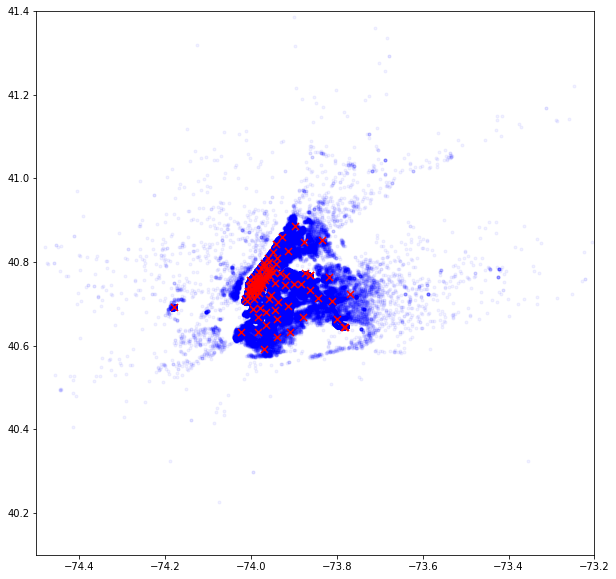

In [335]:
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
plt.xlim(-74.5,-73.2)
plt.ylim(40.1,41.4)
plt.scatter(train['dropoff_longitude'], train['dropoff_latitude'], marker='.', c='blue', alpha=0.05)
plt.scatter(clusters_dropoff[:,1], clusters_dropoff[:,0], marker='x', c='red', s=50)
plt.show()

# CENTER CLUSTERS 

In [336]:
train['kmean_center'] = kmeans.predict(train[['center_latitude', 'center_longitude']])
clusters_center = kmeans.cluster_centers_
#+++++++++++++++++++++++++++++++++++++++++++++++++++
test['kmean_center'] = kmeans.predict(test[['center_latitude', 'center_longitude']])

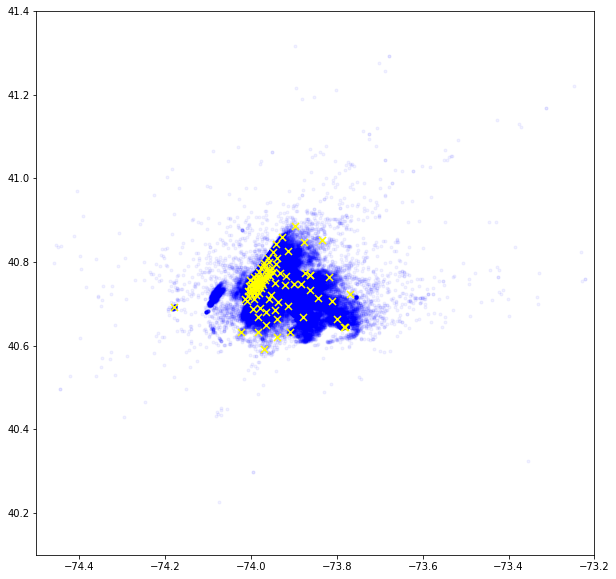

In [337]:
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
plt.xlim(-74.5,-73.2)
plt.ylim(40.1,41.4)
plt.scatter(train['center_longitude'], train['center_latitude'], marker='.', c='blue', alpha=0.05)
plt.scatter(clusters_center[:,1], clusters_center[:,0], marker='x', c='yellow', s=50)
plt.show()

# CLUSTER BEARING / DISTANCE

In [338]:
"""
kmean_beardis = MiniBatchKMeans(n_clusters=200, init='k-means++', max_iter=100, batch_size=10000, verbose=0, compute_labels=True, 
                    random_state=356, tol=0.0, max_no_improvement=10, init_size=None, n_init=3, reassignment_ratio=0.01)
kmean_beardis.fit(train[['bearing', 'distance']])
#'dropoff_latitude', 'dropoff_longitude', 'distance', 'bearing', 'pickup_weekday', 'pickup_weekofyear', 'pickup_hour']
train['kmean_bearing'] = kmean_beardis.predict(train[['bearing','distance']])
clusters_beardis = kmean_beardis.cluster_centers_
#+++++++++++++++++++++++++++++++++++
test['kmean_bearing'] = kmean_beardis.predict(test[['bearing','distance']])
"""

"\nkmean_beardis = MiniBatchKMeans(n_clusters=200, init='k-means++', max_iter=100, batch_size=10000, verbose=0, compute_labels=True, \n                    random_state=356, tol=0.0, max_no_improvement=10, init_size=None, n_init=3, reassignment_ratio=0.01)\nkmean_beardis.fit(train[['bearing', 'distance']])\n#'dropoff_latitude', 'dropoff_longitude', 'distance', 'bearing', 'pickup_weekday', 'pickup_weekofyear', 'pickup_hour']\ntrain['kmean_bearing'] = kmean_beardis.predict(train[['bearing','distance']])\nclusters_beardis = kmean_beardis.cluster_centers_\n#+++++++++++++++++++++++++++++++++++\ntest['kmean_bearing'] = kmean_beardis.predict(test[['bearing','distance']])\n"

In [339]:
"""
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
plt.ylim(0,60)
plt.scatter(train['bearing'], train['distance'], marker='.', c='blue', alpha=0.05)
plt.scatter(clusters_beardis[:,0], clusters_beardis[:,1], marker='x', c='red', s=50)
plt.show()
"""

"\nplt.rcParams['figure.figsize'] = [10, 10]\nfig, ax = plt.subplots()\nplt.ylim(0,60)\nplt.scatter(train['bearing'], train['distance'], marker='.', c='blue', alpha=0.05)\nplt.scatter(clusters_beardis[:,0], clusters_beardis[:,1], marker='x', c='red', s=50)\nplt.show()\n"

In [340]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_hour,...,weekd_6,vend_1,vend_2,center_latitude,center_longitude,pca01,pca02,kmean_pickup,kmean_dropoff,kmean_center
count,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,...,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06,1.456454e+06
mean,1.534298e+00,1.663951e+00,-7.397344e+01,4.075095e+01,-7.397334e+01,4.075183e+01,8.367683e+02,3.516774e+00,1.550392e+01,1.360656e+01,...,1.338985e-01,4.657023e-01,5.342977e-01,4.075139e+01,-7.397339e+01,-7.398762e-16,8.908463e-16,4.896336e+01,4.878950e+01,4.830341e+01
std,4.988225e-01,1.313631e+00,3.839180e-02,2.818693e-02,3.616926e-02,3.241839e-02,6.585671e+02,1.681032e+00,8.702965e+00,6.399345e+00,...,3.405433e-01,4.988225e-01,4.988225e-01,2.567278e-02,2.986090e-02,4.262549e-02,3.723959e-02,2.884616e+01,2.832799e+01,2.927286e+01
min,1.000000e+00,0.000000e+00,-7.445901e+01,4.021384e+01,-7.447962e+01,4.022580e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,4.022580e+01,-7.445901e+01,-6.946797e-01,-6.743538e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073736e+01,-7.399133e+01,4.073589e+01,3.970000e+02,2.000000e+00,8.000000e+00,9.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,4.073715e+01,-7.399012e+01,-2.486965e-02,-1.792790e-02,2.300000e+01,2.300000e+01,2.100000e+01
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075453e+01,6.620000e+02,4.000000e+00,1.500000e+01,1.400000e+01,...,0.000000e+00,0.000000e+00,1.000000e+00,4.075324e+01,-7.397973e+01,-8.602686e-03,2.883317e-03,4.900000e+01,4.900000e+01,4.500000e+01
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01,1.073000e+03,5.000000e+00,2.300000e+01,1.900000e+01,...,0.000000e+00,1.000000e+00,1.000000e+00,4.076726e+01,-7.396552e+01,1.349669e-02,2.178786e-02,7.200000e+01,7.200000e+01,7.600000e+01
max,2.000000e+00,9.000000e+00,-7.322268e+01,4.131916e+01,-7.320551e+01,4.138700e+01,1.141100e+04,6.000000e+00,3.100000e+01,2.300000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,4.131788e+01,-7.322268e+01,1.078272e+00,7.306219e-01,9.900000e+01,9.900000e+01,9.900000e+01


In [341]:
train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_month                   int64
pickup_day                     int64
pickup_hour                    int64
pickup_minute                  int64
lat1                         float64
lon1                         float64
lat2                         float64
lon2                         float64
dlon                         float64
dlat                         float64
a                            float64
c                            float64
distance                     float64
rot_pick_long                float64
rot_pick_lat                 float64
rot_drop_long                float64
r

In [342]:
train.speed.describe()

count    1.456454e+06
mean     1.442505e+01
std      1.147089e+01
min      0.000000e+00
25%      9.140773e+00
50%      1.280700e+01
75%      1.786029e+01
max      9.277748e+03
Name: speed, dtype: float64

In [343]:
train.kmean_pickup.describe()

count    1.456454e+06
mean     4.896336e+01
std      2.884616e+01
min      0.000000e+00
25%      2.300000e+01
50%      4.900000e+01
75%      7.200000e+01
max      9.900000e+01
Name: kmean_pickup, dtype: float64

In [344]:
t0 = dt.datetime.now()

speed_label_zone = np.zeros((7,24,20))
for u in range(0,7):
    for i in range(0,24):
        for j in range(0,20):
            z = np.mean(train['speed'].loc[(train['pickup_hour'] == i) & (train['kmean_pickup']==j) & (train['pickup_weekday'] == u)])
            
            speed_label_zone[u,i,j] = z
speed_label_zone

t1 = dt.datetime.now()
print(t1-t0)
speed_label_zone
speed_label_zone.shape

t0 = dt.datetime.now()

train['label_speed'] = ''
for u in range(0,7):
    for i in range(0,24):
        for j in range(0,20):
            train.label_speed.loc[(train['pickup_hour'] == i) & (train['kmean_pickup']==j) & (train['pickup_weekday'] == u)] = speed_label_zone[u,i,j]

t1 = dt.datetime.now()
print(t1-t0)


KeyboardInterrupt: 

In [ ]:
train.isna().sum()

In [ ]:
train.head()

In [ ]:
train.columns

# MODELLING  XGBOOST

In [345]:
from sklearn.cross_validation import train_test_split

y = list(train['log_trip_duration'])

feature_names = [ 'vend_1', 'vend_2','passenger_count', 'pickup_month', 'pickup_day', 'pickup_hour',
       'pickup_minute', 'distance', 'pickup_weekofyear','center_longitude', 'center_latitude', 'kmean_pickup', 
                 'kmean_dropoff','kmean_center', 'flg_N', 'flg_Y', 'weekd_0', 'weekd_1', 'weekd_2', 'weekd_3', 'weekd_4',
                 'weekd_5', 'weekd_6', 'pca01', 'pca02', 'bearing', 'rot_drop_long', 'rot_drop_lat', 'rot_pick_long', 'rot_pick_lat']



In [346]:
import xgboost as xgb

In [347]:
Xtr, Xv, ytr, yv = train_test_split(train[feature_names].values, y, test_size=0.2, random_state=1987)
dtrain = xgb.DMatrix(Xtr, label=ytr)
dvalid = xgb.DMatrix(Xv, label=yv)
dtest = xgb.DMatrix(test[feature_names].values)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Try different parameters! My favorite is random search :)
xgb_pars = {'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,
            'subsample': 0.8, 'lambda': 1., 'nthread': 4, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

In [348]:
# You could try to train with more epoch
t0 = dt.datetime.now()
model = xgb.train(xgb_pars, dtrain, 200, watchlist, early_stopping_rounds=50,
                  maximize=False, verbose_eval=10)

[0]	train-rmse:4.23233	valid-rmse:4.23237
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[10]	train-rmse:0.434179	valid-rmse:0.438273
[20]	train-rmse:0.363176	valid-rmse:0.372796
[30]	train-rmse:0.345588	valid-rmse:0.359788
[40]	train-rmse:0.334514	valid-rmse:0.351752
[50]	train-rmse:0.328779	valid-rmse:0.348511
[60]	train-rmse:0.325689	valid-rmse:0.346941
[70]	train-rmse:0.322604	valid-rmse:0.344994
[80]	train-rmse:0.319115	valid-rmse:0.343683
[90]	train-rmse:0.315457	valid-rmse:0.34208
[100]	train-rmse:0.313286	valid-rmse:0.341724
[110]	train-rmse:0.311906	valid-rmse:0.341353
[120]	train-rmse:0.31086	valid-rmse:0.341035
[130]	train-rmse:0.309783	valid-rmse:0.340995
[140]	train-rmse:0.308512	valid-rmse:0.340584
[150]	train-rmse:0.307577	valid-rmse:0.340618
[160]	train-rmse:0.306484	valid-rmse:0.340438
[170]	train-rmse:0.305339	valid-rmse:0.34022
[180]	train-rmse:0.304831	valid-rmse:0.3403

In [349]:
print('Modeling RMSLE %.5f' % model.best_score)
t1 = dt.datetime.now()
print('Training time: %i seconds' % (t1 - t0).seconds)

Modeling RMSLE 0.33994
Training time: 165 seconds


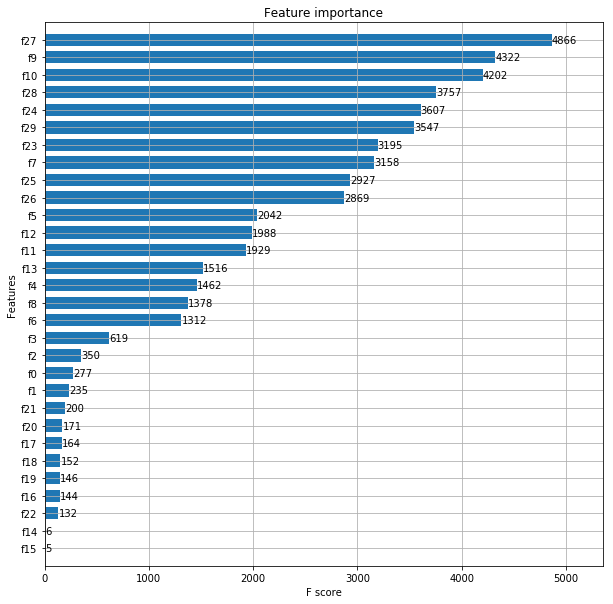

In [350]:
xgb.plot_importance(model, max_num_features=50, height=0.7)

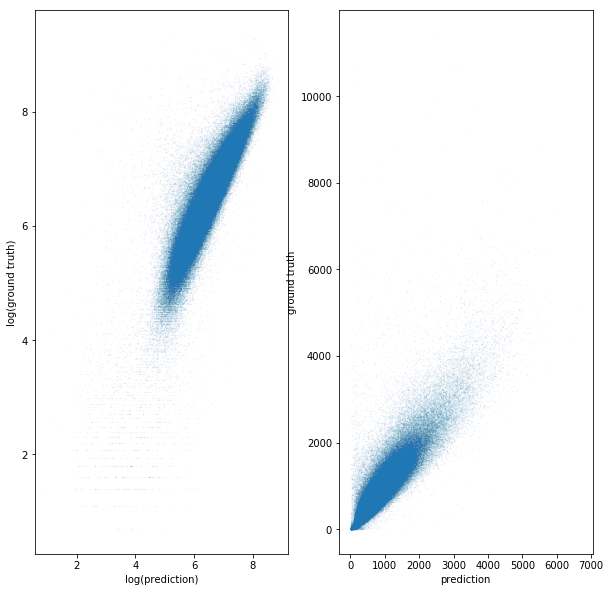

In [351]:
ypred = model.predict(dvalid)
fig,ax = plt.subplots(ncols=2)
ax[0].scatter(ypred, yv, s=0.1, alpha=0.1)
ax[0].set_xlabel('log(prediction)')
ax[0].set_ylabel('log(ground truth)')
ax[1].scatter(np.exp(ypred), np.exp(yv), s=0.1, alpha=0.1)
ax[1].set_xlabel('prediction')
ax[1].set_ylabel('ground truth')
plt.show()

Test shape OK.
Valid prediction mean: 6.459
Test prediction mean: 6.460


C:\Users\genette\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\genette\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


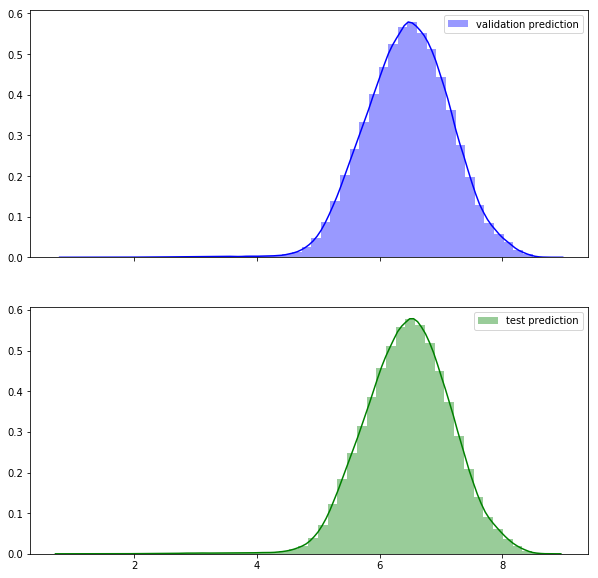

Total time: 182 seconds


In [352]:
import seaborn as sns
ytest = model.predict(dtest)
print('Test shape OK.') if test.shape[0] == ytest.shape[0] else print('Oops')
test['trip_duration'] = np.exp(ytest) - 1
test[['id', 'trip_duration']].to_csv('XGB submission rotate.csv.gz', index=False, compression='gzip')

print('Valid prediction mean: %.3f' % ypred.mean())
print('Test prediction mean: %.3f' % ytest.mean())

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
sns.distplot(ypred, ax=ax[0], color='blue', label='validation prediction')
sns.distplot(ytest, ax=ax[1], color='green', label='test prediction')
ax[0].legend(loc=0)
ax[1].legend(loc=0)
plt.show()

t1 = dt.datetime.now()
print('Total time: %i seconds' % (t1 - t0).seconds)

In [353]:
rmse_wo_feature = [0.39224, 0.38816, 0.38726, 0.38780, 0.38773, 0.38792, 0.38753, 
                   0.38745, 0.38710, 0.38767, 0.38738, 0.38750, 0.38678, 0.39359, 
                   0.38672, 0.38794, 0.38694, 0.38750, 0.38742, 0.38673, 0.38754, 
                   0.38705, 0.38736, 0.38741, 0.38764, 0.38730, 0.38736, 0.38741, 0.38764, 0.38730]

feature_importance_dict = model.get_fscore()
fs = ['f%i' % i for i in range(len(feature_names))]
f1 = pd.DataFrame({'f': list(feature_importance_dict.keys()),
                   'importance': list(feature_importance_dict.values())})
f2 = pd.DataFrame({'f': fs, 'feature_name': feature_names, 'rmse_wo_feature': rmse_wo_feature})
feature_importance = pd.merge(f1, f2, how='right', on='f')
feature_importance = feature_importance.fillna(0)

feature_importance[['feature_name', 'importance', 'rmse_wo_feature']].sort_values(by='importance', ascending=False)

,feature_name,importance,rmse_wo_feature
8,rot_drop_lat,4866,0.38741
24,center_longitude,4322,0.38767
19,center_latitude,4202,0.38738
17,rot_pick_long,3757,0.38764
0,pca02,3607,0.38764
1,rot_pick_lat,3547,0.38730
7,pca01,3195,0.38741
6,distance,3158,0.38745
26,bearing,2927,0.38730
16,rot_drop_long,2869,0.38736


# TEST FILE

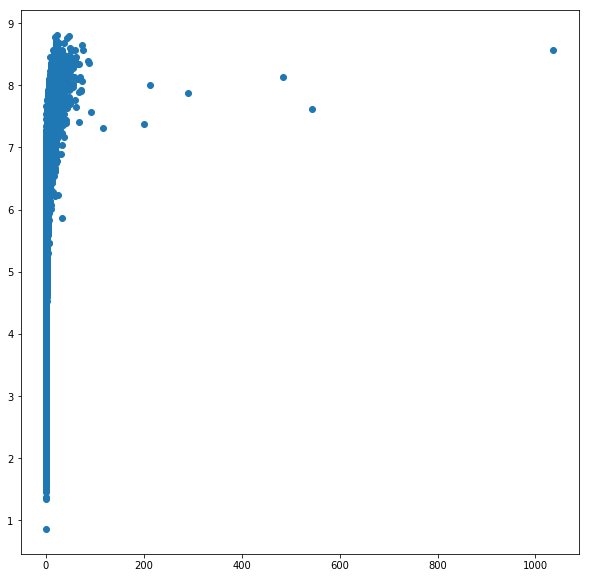

In [355]:
plt.scatter(test['distance'], ytest)
plt.show()